Name: Aayam Raj Shakya (as5160)

In [1]:
# Importing everything at once to avoid repetition
import numpy as np
import matplotlib.pyplot as plt
import random

2.1. Use nested for loops to assign entries of a 5 × 5 matrix A such that A[i, j] = ij.

In [2]:
mtrx = np.ones((5,5))
for row in range(5):
    for col in range(5):
        mtrx[row][col] = (row+1) * (col+1)
print(mtrx)

[[ 1.  2.  3.  4.  5.]
 [ 2.  4.  6.  8. 10.]
 [ 3.  6.  9. 12. 15.]
 [ 4.  8. 12. 16. 20.]
 [ 5. 10. 15. 20. 25.]]


2.2. The variable d is initially equal to 1. Use a while loop to keep dividing d by 2 until
d < 10^−6.

(a) Determine how many divisions are made.

(b) Verify your result by algebraic derivation.


In [3]:
d = 1
n_divisions = 0
while d > 1e-6:
    d/=2
    n_divisions += 1
print(f"The number of times we can divide d=1 by 2 before it becomes smaller than 10^-6 is: {n_divisions}")

The number of times we can divide d=1 by 2 before it becomes smaller than 10^-6 is: 20


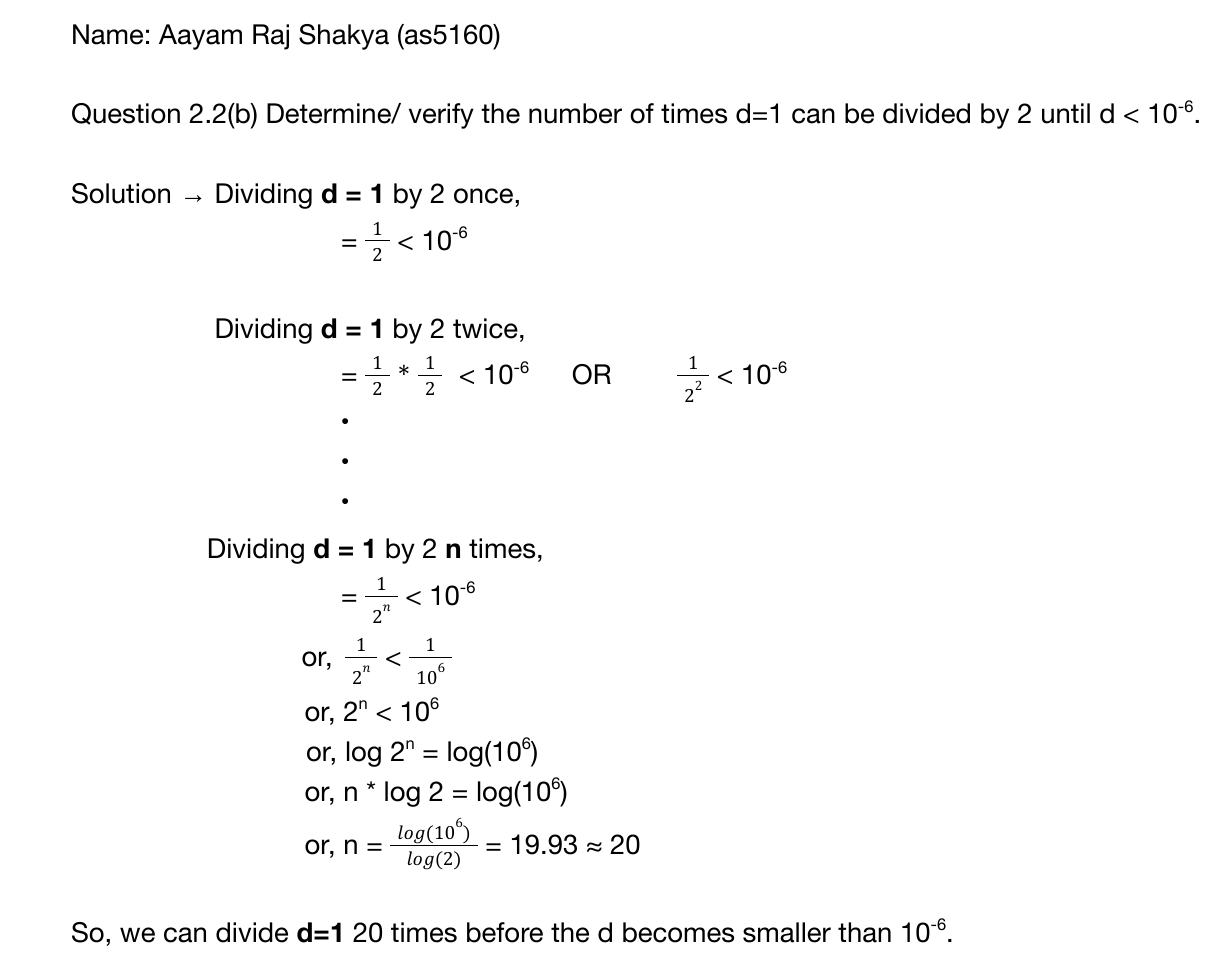

2.3. Write a function that takes as input a list of values and returns the largest value. Do
this without using the Python max() function; you should combine a for loop and an
if statement.

(a) Produce a random list of size 10-20 to verify your function.


In [4]:
def largest(lst):
    tmp = lst[0]
    for i in lst:
        if i > tmp:
            tmp = i
    return tmp

n = random.randint(10, 20)
lst1 = random.sample(range(1, 9999), n)
lst2 = random.sample(range(1, 9999), n)
lst3 = random.sample(range(1, 9999), n)
print(f"The generated list is {lst1} and the result is: ", largest(lst1))

The generated list is [1829, 8609, 1751, 1030, 5993, 7102, 9690, 146, 6111, 8943] and the result is:  9690


In [5]:
print(f"The generated list is {lst2} and the result is: ", largest(lst2))

The generated list is [9305, 1641, 4929, 6275, 2454, 3006, 1543, 390, 2375, 207] and the result is:  9305


In [6]:
print(f"The generated list is {lst3} and the result is: ", largest(lst3))

The generated list is [7320, 7252, 5679, 7918, 8043, 8616, 6240, 5689, 3355, 7161] and the result is:  8616


2.4. Let P4(x) = 2x
4 − 5x
3 − 11x
2 + 20x + 10. Solve the following.

(a) Plot P4 over the interval [−3, 4].

(b) Find all zeros of P4, modifying Zeros-Polynomials-Newton-Horner.py, p.32.

(c) Add markers for the zeros to the plot.

(d) Find all roots of P'4(x) = 0.

(e) Add markers for the zeros of P'4 to the plot.

In [7]:
def horner(A, x0):
  n = len(A)
  p = A[0]; d = 0

  for i in range(1, n):
    d = p + x0 * d
    p = A[i] + x0 * p
  return p, d

def newton_horner(A, x0, tol, itmax):
  x = x0
  for it in range(1, itmax+1):
    p, d = horner(A,x)
    h = -p/d;
    x = x + h;
    if(abs(h)<tol): break
  return x, it

def helper_func(A, tol, itmax, nth_order):
  possible_roots = []
  # generates "nth_order" evenly spaced numbers from (-3, 4)
  # Eg: 4th order polynomial = 4 evenly spaced x0 (initial guesses)
  for x0 in np.linspace(-3, 4, nth_order):
    x, it =  newton_horner(A, x0, tol, itmax)
    possible_roots.append(round(x,3))
  return possible_roots

if __name__ == "__main__":
  tol = 10**(-12); itmax = 9999
  P4 = [2, -5, -11, 20, 10]
  nth_order = len(P4) - 1
  print("The possible roots of P4 are: ",
        helper_func(P4, tol, itmax, nth_order))

The possible roots of P4 are:  [np.float64(-2.032), np.float64(-0.424), np.float64(1.903), np.float64(3.053)]


In [8]:
# P4 = 2x^4 - 5x^3 - 11x^2 + 20x + 10
# P4' or P4_der = 8x^3 - 15x^2 -22x + 20

P4_der = [8, -15, -22, 20]
print("The possible roots of P4_der are: ",
      helper_func(P4_der, tol, itmax, len(P4_der) - 1))

The possible roots of P4_der are:  [np.float64(-1.392), np.float64(0.7), np.float64(2.567)]


The code block below fulfills 2.4 a, c, and e

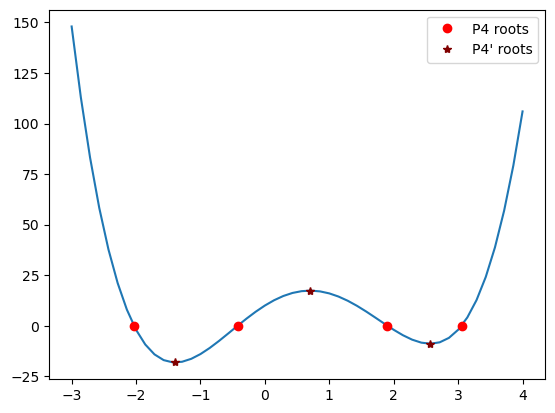

In [9]:
# this func is used to find the y-coordinates
def polynomial(x):
    return 2*x**4 - 5*x**3 - 11*x**2 + 20*x + 10

x = np.linspace(-3, 4)  # our interval
y = polynomial(x)
plt.plot(x, y)

# have to convert the list to numpy array, otherwise wont work)
P4_x_val = np.array(helper_func(P4, tol, itmax, nth_order))
P4_y_val = polynomial(P4_x_val)
plt.plot(P4_x_val, P4_y_val, "o", color="red", label="P4 roots")

P4_der_x_val = np.array(helper_func(P4_der, tol, itmax, len(P4_der) - 1))
P4_der_y_val = polynomial(P4_der_x_val)
plt.plot(P4_der_x_val, P4_der_y_val, "*", color="maroon", label="P4' roots")

plt.legend()
plt.show()